# Template Matching - Assignment
---

<b><div style="text-align: right">[TOTAL POINTS: 10]</div></b>

In this assignment, you will learn to detect and locate a certain pattern in the image. The assignment is based on the chapter Template matching where you find the match of a template on the source image. By the end of this assignment, you will get familiar with the concept of template, source, template matching, probability map, and bounding box.

### Problem Formulation

For the template matching assignment, we have chosen *** Where's Wally?*** children's puzzle.

Where's Wally? (called Where's Waldo? in North America) is a children's puzzle books created by english illustrator Martin Handford. The books consist of a series of detailed illustrations showing dozens or more people doing several amusing things at a given location. The readers' task is to find a character, i.e., Wally, hidden in a group of dozens of people.
His red-and-white-striped shirt identifies wally. He wears a bobble hat and glasses.

<center>
<img src="https://drive.google.com/uc?export=view&id=1lsmtRBFfoOLb3nSdWSOHxSpZ0xegd3vy" alt="centered image" align='center' width = 40px height=100px/>

Figure 1.: Wally
</center>

Where's wally children puzzle book consist of a series of an image where wally is to be located, among many images we have taken one as a source image where wally is to be located. For an Assignment, we use the template matching technique to find wally in the source image.



In Computer Vision, Template matching is the process for finding areas in an image similar to a template.
To find it, you have to give two input images:

*  **Source Image (S)** – The image in which the template is searched and find the match if it exists.

*  **Template Image (T)** – The image which searched and to is located in the source image.

<center>
<img src="https://drive.google.com/uc?export=view&id=1sIgLPkNQOcy29UvnOKyMfB6XgDyLLRZo" alt="centered image" align='center' width = 30px height=50px/>

fig 3. Template (wally)
</center>
<center>
<img src="https://drive.google.com/uc?export=view&id=1Gbmcodxytp2O9UPC8COVJKFa0RvXaJcF" alt="centered image" align='center' width = 800px height=400px/>

Figure 2: Source image.
</center>

Let's look at the source image first and try to locate wally by our plain sight. It might take over a minute or much more. Waldo is like a hide and seeks game for the human eye. Waldo is not hiding anywhere, but it's difficult to locate waldo immediately due to noise and distraction in the source image.

 **The question here you are trying to figure out is? Can we use Some technique in Computer Vision that can automatically and immediately locate Waldo?**



### Goal



The main objective is to apply a template matching using `OpenCV` to locate the template(wally image) in the source image( puzzle image). Wally is somewhere in the crowd of dozens of people, so you use a template matching technique to search wally and locate by drawing a bounding box around wally.




This Assignment is divided into 3 Exercises.


1.   Load required libraries and images.
   > Load the required libraries, prespecified images, and visualize template and source image. Convert the images to the RGB channel. Reduce the size of the source and template proportionally for faster computation.

2.   Apply template Matching.

   >  Here, you apply template matching using `OpenCV` with a prespecified match method.


3.   Locate match pixel coordinates.

    > Here comes the final part where extract the pixel coordinate of the match above some prespecified threshold of the match. And finally, we draw a bounding box on the match patch in the source image.

### Import required Libraries



In this section, you have to import the necessary libraries. Libraries required for this assignment are :


1.   Numpy

2.   OpenCV (cv2)

3.   Matplotlib



In [13]:
# Import required Libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [14]:
# download required images

! wget "https://drive.google.com/uc?export=view&id=1sIgLPkNQOcy29UvnOKyMfB6XgDyLLRZo" -O template_image.jpeg

! wget "https://drive.google.com/uc?export=view&id=1Gbmcodxytp2O9UPC8COVJKFa0RvXaJcF" -O source_image.jpeg


--2024-07-01 08:05:12--  https://drive.google.com/uc?export=view&id=1sIgLPkNQOcy29UvnOKyMfB6XgDyLLRZo
Resolving drive.google.com (drive.google.com)... 142.250.193.238, 2404:6800:4002:81d::200e
Connecting to drive.google.com (drive.google.com)|142.250.193.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1sIgLPkNQOcy29UvnOKyMfB6XgDyLLRZo&export=view [following]
--2024-07-01 08:05:13--  https://drive.usercontent.google.com/download?id=1sIgLPkNQOcy29UvnOKyMfB6XgDyLLRZo&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.77.193, 2404:6800:4002:813::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.77.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3804 (3.7K) [image/jpeg]
Saving to: ‘template_image.jpeg’

template_image.jpeg 100%[===================>]   3.71K  --.-KB/s    in 0s      

2024-07-01 08:

## **Exercise 1: Read images and Preprocess**




**Task: 1**
- Using opencv read source and template images from `./source_image.jpeg` and `./template_image.jpeg`  and assign to variable `source_image`and `template_image`respectively.

<b><div style="text-align: right">[POINTS: 1]</div></b>


In [15]:
### Ex-1-Task-1
source_image = None

template_image = None

### BEGIN SOLUTION
# your code here
source_image = cv2.imread("./source_image.jpeg")
template_image = cv2.imread("./template_image.jpeg")
### END SOLUTION

print(source_image.shape)

print(template_image.shape)

(1080, 1920, 3)
(85, 45, 3)


In [16]:
### INTENTIONALLY LEFT BLANK



 OpenCV has the `BGR` channel order by default so let´s Convert channel order to `RGB`.

In [17]:


template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)




Visualize source and template images.

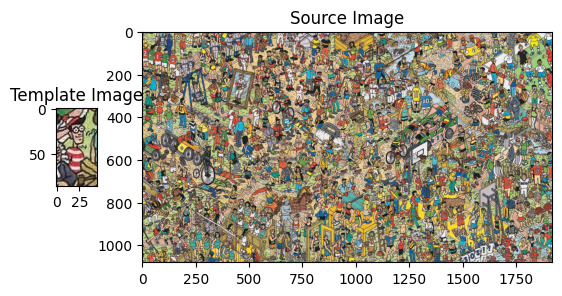

In [18]:
from matplotlib import gridspec

fig = plt.figure()
sub = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1, 10])

ax0 = fig.add_subplot(sub[0])
ax0.imshow(template_image)
ax0.title.set_text("Template Image")

ax1 = fig.add_subplot(sub[1])
ax1.imshow(source_image)
ax1.title.set_text("Source Image")

plt.show()

**Task: 2**


 Working on Large size source image and template image increases the computational time so we resize original images to same scale for faster computation.
- Resize source image and template image to same scale i,e 80% of its original. Assign resized width and height to `width`and `height`variable.

<b><div style="text-align: right">[POINTS: 2]</div></b>

In [19]:
### Ex-1-Task-2

# resizer function

def image_resizer(image, scale_percent = 80 ):



    width = None
    height = None
    dim = (width,height)

    ### BEGIN SOLUTION
    # your code here
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    ### END SOLUTION

    # resize image
    return cv2.resize(image, dim)


## calling resizer function for source and template

resized_source_image = image_resizer(source_image)

resized_template_image = image_resizer(template_image)

print(resized_source_image.shape, resized_template_image.shape)


(864, 1536, 3) (68, 36, 3)


In [20]:
### INTENTIONALLY LEFT BLANK


**Task: 3**


 Working on color (3 channels) image also increases computational time, so we need to convert the image to grayscale in order for quick computation.
- Convert the resized source and template images to grayscale and assign to variable `gray_source_image` and `gray_template_image` respectively.

<b><div style="text-align: right">[POINTS: 2]</div></b>

In [21]:
### Ex-1-Task-3

gray_source_image = None

gray_template_image = None

### BEGIN SOLUTION
# your code here
gray_source_image = cv2.cvtColor(resized_source_image, cv2.COLOR_RGB2GRAY)
gray_template_image = cv2.cvtColor(resized_template_image, cv2.COLOR_RGB2GRAY)
### END SOLUTION

print(gray_source_image.shape)

print(gray_template_image.shape)

(864, 1536)
(68, 36)


In [22]:
### INTENTIONALLY LEFT BLANK


## **Exercise 2: Apply Template Matching**




**Task: 1**
- Using opencv apply matchTemplate function with `cv2.TM_CCOEFF_NORMED` as method for match. Save the returned probability map to the varialbe `result`.

<b><div style="text-align: right">[POINTS: 2]</div></b>

In [23]:
### Ex-2-Task-1

result = None

### BEGIN SOLUTION
# your code here
result = cv2.matchTemplate(gray_source_image, gray_template_image, cv2.TM_CCOEFF_NORMED)
### END SOLUTION


In [24]:
### INTENTIONALLY LEFT BLANK


## visualizing probability map

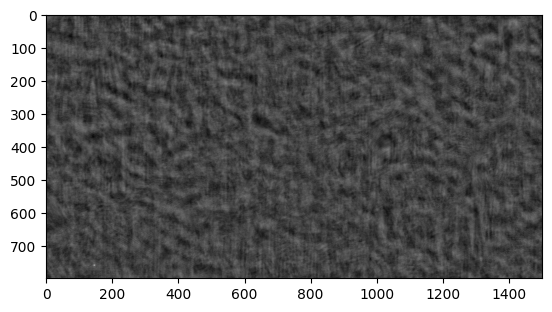

In [25]:

plt.imshow(result, cmap="gray")
plt.show()

## **Exercise 3: Locate Match pixel coordinates**




**Task: 1**
- Extract (x,y) pixel location of the match using 0.8 thresholds of probability map. Also, assign pixel coordinates to `loc` variable.

<b><div style="text-align: right">[POINTS: 2]</div></b>

In [26]:
### Ex-3-Task-1
loc = None

### BEGIN SOLUTION
# your code here
threshold = 0.8
loc = np.where(result > threshold)
### END SOLUTION


print (loc)

(array([758]), array([146]))


In [27]:
### INTENTIONALLY LEFT BLANK



**Task: 2**
- Get height and width of the template image , also assign to `h`and `w`variable respectively.

<b><div style="text-align: right">[POINTS: 1]</div></b>

In [28]:
### Ex-3-Task-2

h= None

w= None


### BEGIN SOLUTION
# your code here
h = int(template_image.shape[0])
w = int(template_image.shape[1])
### END SOLUTION

In [29]:
### INTENTIONALLY LEFT BLANK




Using coordinates of match assigned to `loc`variable, `h`and `w`variable, we draw a rectangular bounding box to locale wally in the puzzle image.

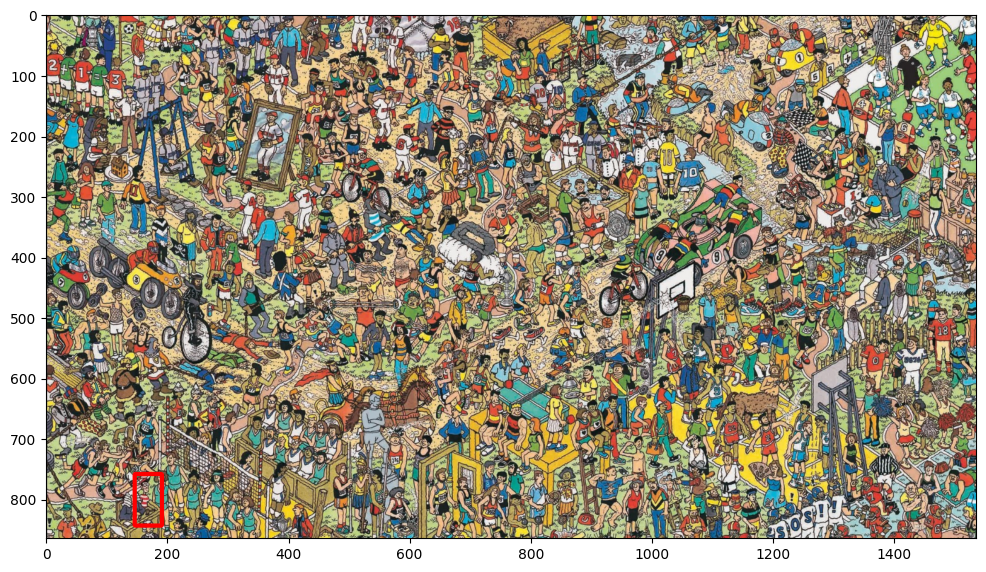

In [30]:


for lo in zip(*loc[::-1]):
    cv2.rectangle(resized_source_image, lo, (lo[0] + w, lo[1] + h), (255, 0, 0), 5)


plt.figure(figsize = (12,8))
plt.imshow(resized_source_image)
plt.show()

